In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics
import plotly_express as px

from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import make_pipeline
from sklearn.dummy import DummyClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score , ConfusionMatrixDisplay , classification_report
import warnings


In [2]:
heartData = pd.read_csv('framingham.csv')
heartData.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [3]:
# Information about the Variables
heartData.info()
heartData.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


(4238, 16)

In [4]:
heartData.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4238.000000,4133.000000,4238.000000,4209.000000,4185.000000,4238.000000,4238.000000,4238.000000,4188.000000,4238.000000,4238.000000,4219.000000,4237.000000,3850.000000,4238.000000
mean,0.429212,49.584946,1.978950,0.494101,9.003089,0.029630,0.005899,0.310524,0.025720,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753,0.151958
std,0.495022,8.572160,1.019791,0.500024,11.920094,0.169584,0.076587,0.462763,0.158316,44.590334,22.038097,11.910850,4.080111,12.026596,23.959998,0.359023
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,89.875000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


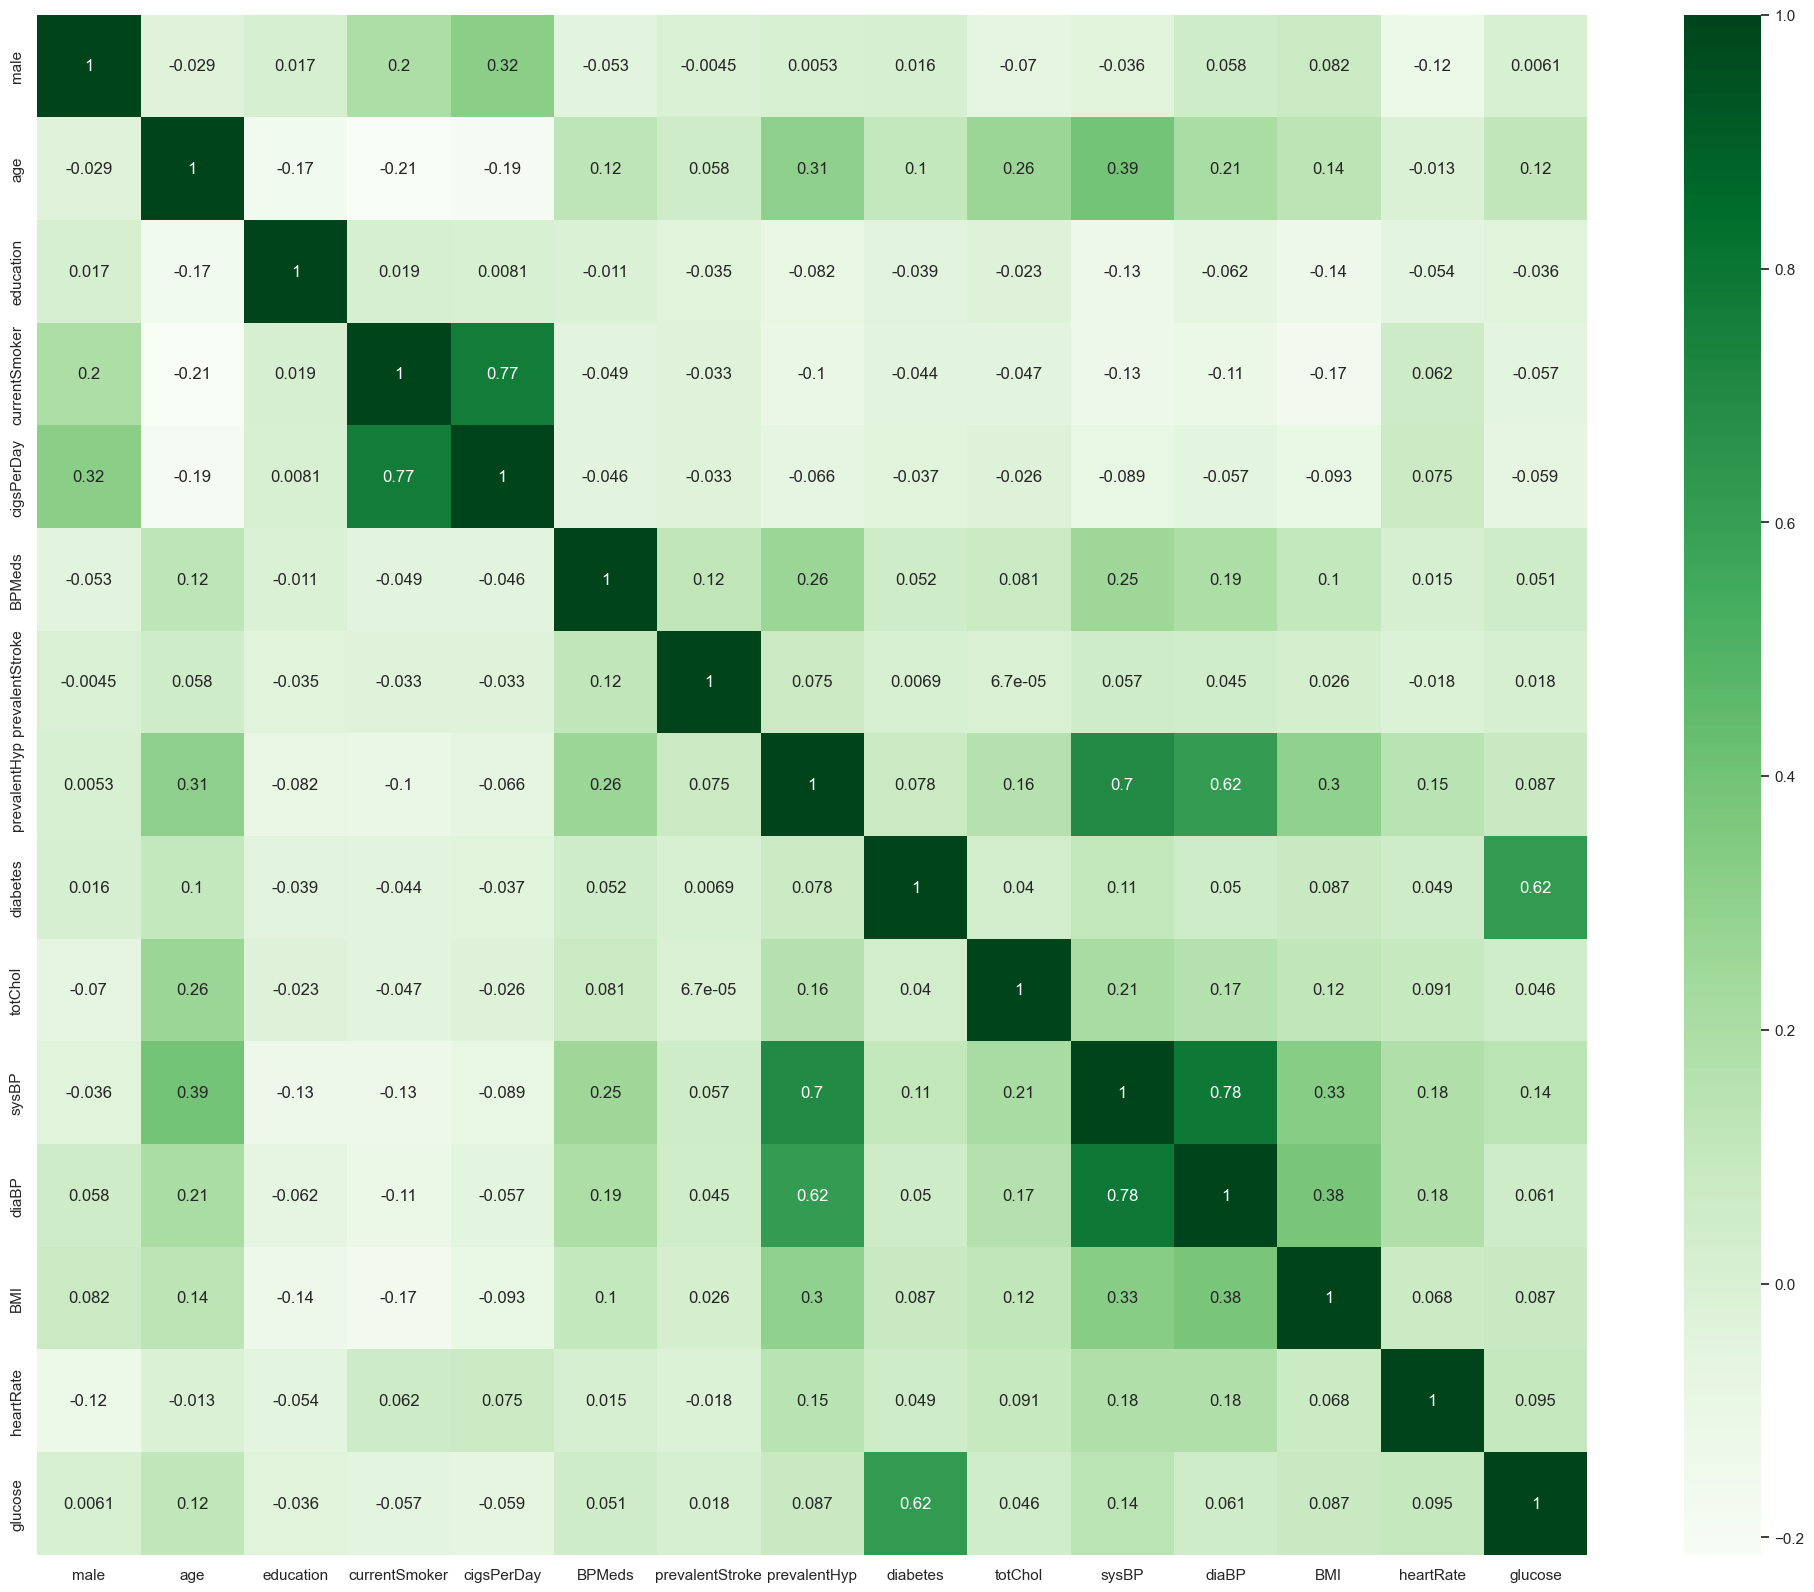

In [5]:
corr = heartData.drop(columns= 'TenYearCHD').corr()
fig , ax = plt.subplots(figsize=(25 , 20))
sb.heatmap(corr ,annot= True , ax=ax , cmap= 'Greens');

In [6]:
X = heartData.drop('TenYearCHD' , axis= 'columns')
y = heartData['TenYearCHD']

In [7]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2 , shuffle=True , random_state=4)

In [8]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [9]:
#baseline classifier

dummy_classifier = DummyClassifier(strategy='most_frequent')
dummy_classifier.fit(X_train , y_train)
y_pred = dummy_classifier.predict(X_test)
accuracy = accuracy_score(y_test , y_pred)
print(f"Baseline Model Accuracy: {accuracy:.4f}")

Baseline Model Accuracy: 0.8455


In [10]:
#logistic regression model

lr_model = make_pipeline(SimpleImputer(strategy='mean') , MinMaxScaler() , LogisticRegression(penalty='l2' , C= 12 ,max_iter=1500))
lr_model.fit(X_train , y_train)

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('minmaxscaler', MinMaxScaler()),
                ('logisticregression',
                 LogisticRegression(C=12, max_iter=1500))])

In [11]:
lr_model.score(X_train , y_train)

0.855457227138643

In [12]:
lr_pred = lr_model.predict(X_test)
lr_acc_score = accuracy_score(y_test , lr_pred)
lr_acc_score

0.8525943396226415

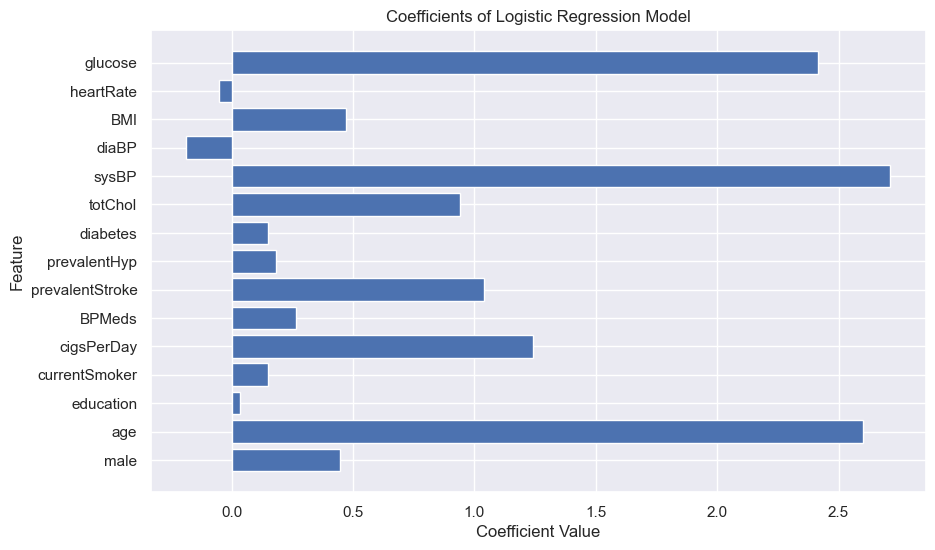

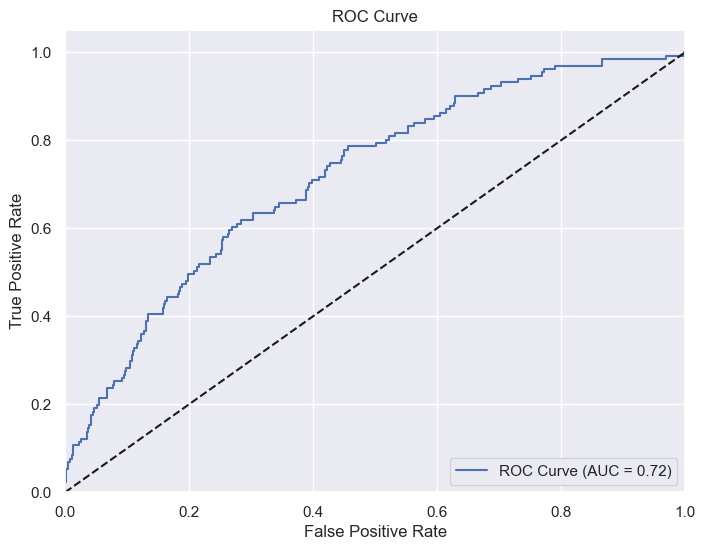

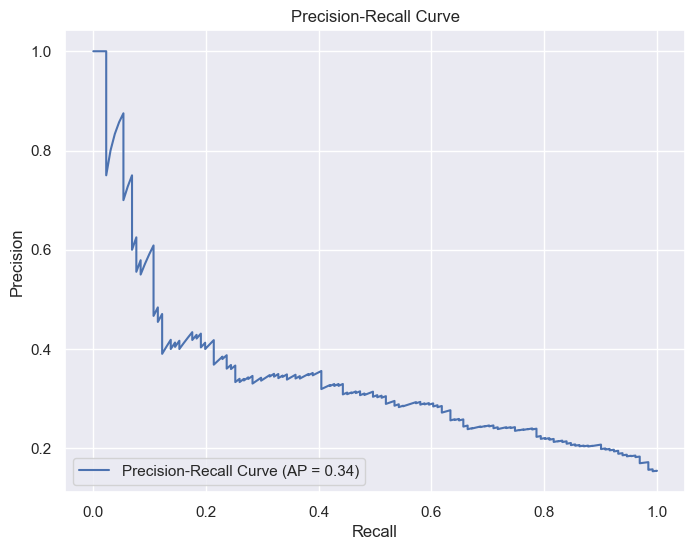

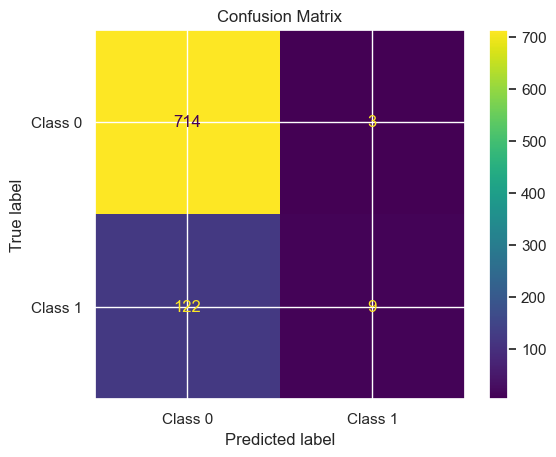

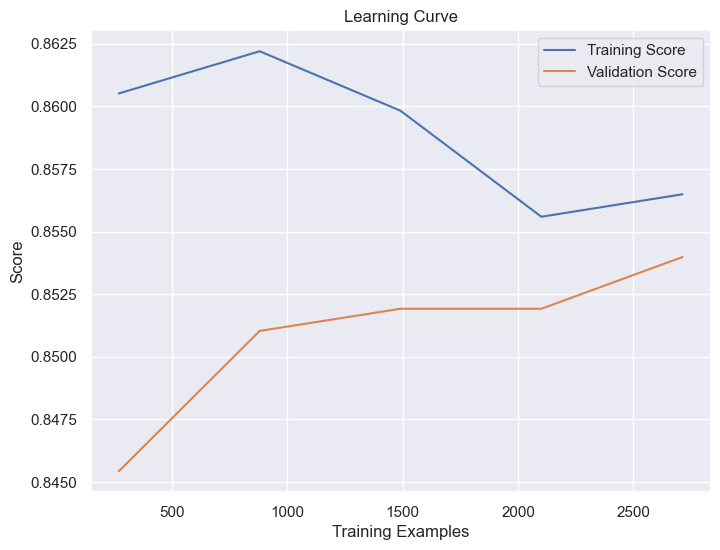

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, average_precision_score, ConfusionMatrixDisplay
from sklearn.model_selection import learning_curve

# Coefficients Plot
coefficients = lr_model.named_steps['logisticregression'].coef_.flatten()
feature_names = X_train.columns
plt.figure(figsize=(10, 6))
plt.barh(feature_names, coefficients)
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Coefficients of Logistic Regression Model')
plt.show()

# ROC Curve
y_pred_proba = lr_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC Curve (AUC = {:.2f})'.format(roc_auc_score(y_test, y_pred_proba)))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

# Precision-Recall Curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label='Precision-Recall Curve (AP = {:.2f})'.format(average_precision_score(y_test, y_pred_proba)))
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()

# Confusion Matrix
confusion_matrix_display = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, lr_model.predict(X_test)), display_labels=["Class 0", "Class 1"])
confusion_matrix_display.plot()
plt.title('Confusion Matrix')
plt.show()

# Learning Curve
train_sizes, train_scores, test_scores = learning_curve(lr_model, X_train, y_train, cv=5)
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Training Score')
plt.plot(train_sizes, np.mean(test_scores, axis=1), label='Validation Score')
plt.xlabel('Training Examples')
plt.ylabel('Score')
plt.title('Learning Curve')
plt.legend(loc="best")
plt.show()

In [26]:
print("True postive rate = 9/131 = 6%")

True postive rate = 9/131 = 6%


In [27]:
#decision tree

dt_model = make_pipeline(SimpleImputer(strategy='mean') , MinMaxScaler() , DecisionTreeClassifier())
dt_model.fit(X_train , y_train)


Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('minmaxscaler', MinMaxScaler()),
                ('decisiontreeclassifier', DecisionTreeClassifier())])

In [28]:
dt_pred = dt_model.predict(X_test)
dt_acc_score = accuracy_score(y_test , dt_pred)
dt_acc_score

0.7417452830188679

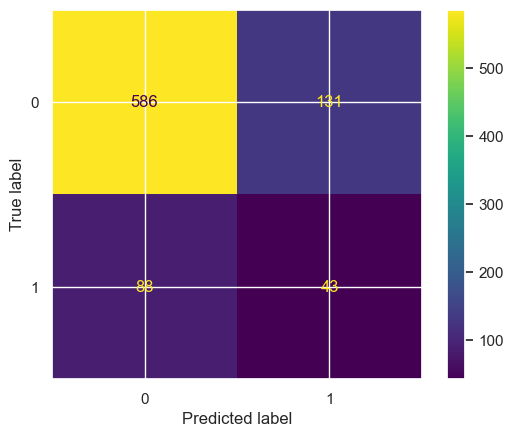

In [29]:
ConfusionMatrixDisplay.from_estimator(dt_model , X_test , y_test);

In [30]:
print("True postive rate = 43/131 = 32.8%")

True postive rate = 43/131 = 32.8%


In [31]:
#random forest
rf_model = make_pipeline(SimpleImputer(strategy='mean') , MinMaxScaler() , RandomForestClassifier(n_estimators=500))
rf_model.fit(X_train , y_train)

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('minmaxscaler', MinMaxScaler()),
                ('randomforestclassifier',
                 RandomForestClassifier(n_estimators=500))])

In [32]:
rf_pred = rf_model.predict(X_test)
rf_acc_score = accuracy_score(y_test , rf_pred)
rf_acc_score

0.8525943396226415

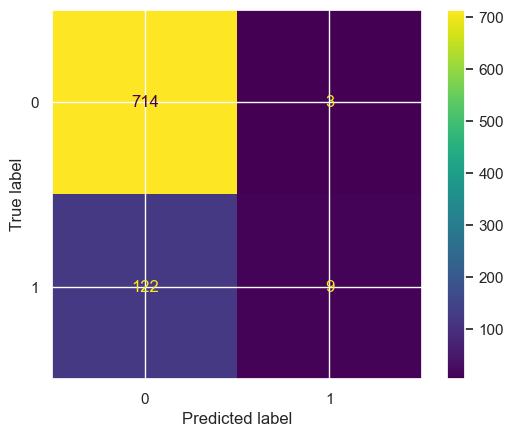

In [38]:
ConfusionMatrixDisplay.from_estimator(rf_model , X_test , y_test);

In [39]:
print("True postive rate = 9/131 = 6%")

True postive rate = 9/131 = 6%


In [42]:
#support vector machine
svc = make_pipeline(SimpleImputer(strategy='mean') , MinMaxScaler() , SVC())
svc.fit(X_train , y_train)

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('minmaxscaler', MinMaxScaler()), ('svc', SVC())])

In [43]:
svc.score(X_train , y_train)

0.8539823008849557

In [44]:
svc_pred = svc.predict(X_test)
svc_acc_score = accuracy_score(y_test , svc_pred)
svc_acc_score

0.8455188679245284

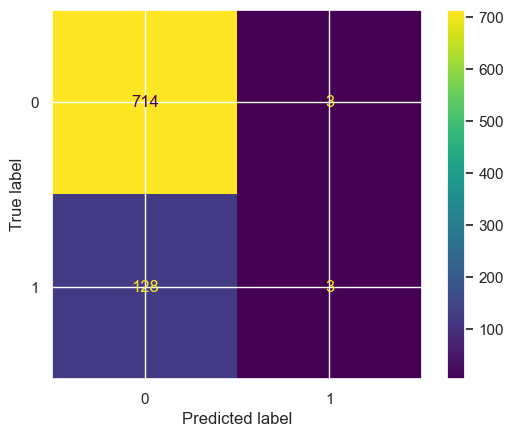

In [45]:
ConfusionMatrixDisplay.from_estimator(svc , X_test , y_test);